C:\Users\User\AppData\Local\Temp\ipykernel_16080\1459567238.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  contour_data_1 = contour_data_1.append({"Contour Number": contour_number,"Contour" : approx,"Area": area, "Perimeter": cv2.arcLength(approx, True)},ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16080\1459567238.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  contour_data_1 = contour_data_1.append({"Contour Number": contour_number,"Contour" : approx,"Area": area, "Perimeter": cv2.arcLength(approx, True)},ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16080\1459567238.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  contour_data_1 = contour_data_1.append({"Contour Number": co

Red sample Blood Report :
Total rbc: 613.0
haemoglobin perecentage : 65.33021167327647
MCV : 25479.941749877224
RDW: 5.431183363730447
Total WBC : 3
Total Platelets : 190
Normal RBC : 443
percentage normal : 72.26753670473083


C:\Users\User\AppData\Local\Temp\ipykernel_16080\1459567238.py:172: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121);plt.imshow(bgr_copy_1)
C:\Users\User\AppData\Local\Temp\ipykernel_16080\1459567238.py:244: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  contour_data_2 = contour_data_2.append({"Contour Number": contour_number,"Contour" : approx,"Area": area, "Perimeter": cv2.arcLength(approx, True)},ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16080\1459567238.py:244: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  contour_data_2 = contour_data_2.append({"Contour Number": contour_number,"Contour" : approx,"Area": area, "Perimeter": cv2.arcLength(approx, True

Blue sample Blood Report :
Total rbc: 762.0
haemoglobin perecentage : 73.46190978993634
MCV : 45907.88965142753
RDW: 15.946217453798068
Normal RBC : 375
percentage normal : 49.21259842519685
Total WBC : 2
Total Platelets : 67


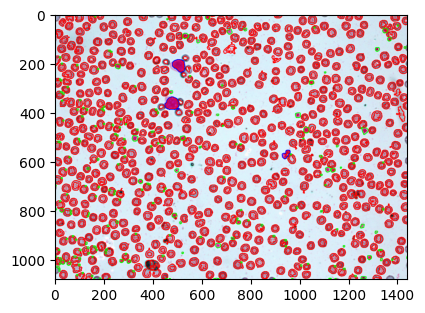

<Figure size 2000x2000 with 0 Axes>

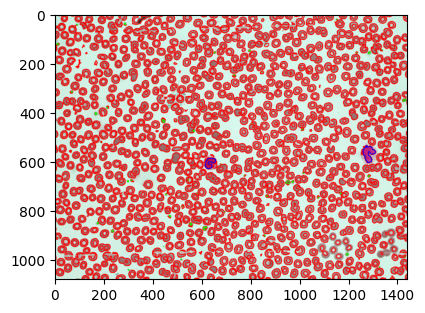

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
# red image input path
input_path = "C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\image_sample\\2022-12-26-17-03-49.jpg"
bgr=  cv2.imread(input_path)
bgr_gray=  cv2.imread(input_path,0)
bgr_copy_1 = bgr.copy()
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
img_hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the green color in the HSV color space
lower_green = np.array([40, 130, 170])
upper_green = np.array([90, 255, 255])

# Threshold the HSV image based on the color range
img_mask = cv2.inRange(img_hsv, lower_green, upper_green)

#split into channels
b,g,r = cv2.split(bgr)
#apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(bgr_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 2)
# Fill holes
filled_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
img_mask= cv2.dilate(img_mask,kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)),iterations=2)
# subtracting the wbc and platelets mask from the original image
filled_image =(filled_image)-img_mask
# External contours of rbc
contours_ext,hierarchy = cv2.findContours(filled_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty DataFrame to store the contour data
contour_data_1 = pd.DataFrame(columns=["Contour Number", "Contour","Area", "Perimeter"])
# empty dictionary for rbc,wbc, platelets count
Count_1={"RBC":0,"Platelet":0,"WBC":0}
min_contour_area = 250  # Minimum threshold area for rbc
max_contour_area = 2000
contours_new = []
for contour in contours_ext:
    # Approximate the contour to a closed polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
   
    # Calculate the contour area
    area = cv2.contourArea(approx)
    x, y, w, h = cv2.boundingRect(approx)

    if area >= min_contour_area and area < max_contour_area:
        M = cv2.moments(approx)
        center_x = int(M["m10"] / M["m00"])
        center_y = int(M["m01"] / M["m00"])
        Count_1["RBC"] += 1
        # Add the contour number as text
        contour_number = str(Count_1["RBC"])
        contours_new.append(approx)
        text_size, _ = cv2.getTextSize(contour_number, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
        text_width, text_height = text_size
        text_x = center_x - int(text_width / 2)
        text_y = center_y + int(text_height / 2)
        cv2.putText(bgr_copy_1, contour_number, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        # Add the contour data to the DataFrame
        
        contour_data_1 = contour_data_1.append({"Contour Number": contour_number,"Contour" : approx,"Area": area, "Perimeter": cv2.arcLength(approx, True)},ignore_index=True)
        cv2.drawContours(bgr_copy_1, [contour], -1, (255, 0, 0), 2)
rbc_count =Count_1["RBC"]
Count_1["RBC"]=0
outer_rbc_area = np.mean([cv2.contourArea(contour) for contour in contours_new])
# Internal and external contours of rbc
contours, hierarchy = cv2.findContours(filled_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

inner_rbc_area = 0
min_contour_area = 30
for i in range(len(contours)):
    contour = contours[i]
    contour_hierarchy = hierarchy[0][i]
    # Calculate the perimeter of the contour
    
    # Calculate the contour area
    area = cv2.contourArea(contour)
    if area >15:
            
            if contour_hierarchy[3] != -1:
                Count_1["RBC"]+=1
                # Inner contour (Has parent contour)
                inner_rbc_area += area
                
                cv2.drawContours(bgr_copy_1,[contour],-1,(255,0,0),2)
total_rbc = (Count_1["RBC"]+rbc_count)/2
print("Red sample Blood Report :")
print("Total rbc:",total_rbc)
inner_rbc_area = inner_rbc_area/Count_1["RBC"]
print("haemoglobin perecentage :",(outer_rbc_area-inner_rbc_area)*100 /outer_rbc_area )

# calculating the MCV of RBCs
def calculate_mcv(contours):
    total_diameter = 0
    num_rbc = 0
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 250:  # Filter out small contours
            num_rbc += 1
            (x, y), (w, h), _ = cv2.fitEllipse(contour)
            diameter = max(w, h)
            total_diameter += diameter
    
    mean_diameter = total_diameter / num_rbc
    mcv = (np.pi / 6) * (mean_diameter**3)
    return mcv

MCV = calculate_mcv(contours_new)
print("MCV :",MCV)

# Function to calculate coarseness
def calculate_coarseness(contour):
    perimeter = cv2.arcLength(contour, True)
    coarseness = perimeter / (2 * np.pi)
    return coarseness

# Function to calculate circularity
def calculate_circularity(contour):
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    return circularity

# calculating RDW of rbcs
def calculate_rdw(contours):
    rbc_volumes = []

    for contour in contours:
        contour= cv2.convexHull(contour)
        area = cv2.contourArea(contour)
        radius = np.sqrt(area / np.pi)
        volume = (4/3) * np.pi * radius**3
        rbc_volumes.append(volume)

    mean_cell_volume = np.mean(rbc_volumes)
    rdw = np.std(rbc_volumes) / mean_cell_volume *10
    return rdw
rdw = calculate_rdw(contours_new)
print("RDW:", rdw)

# Finding count  of  WBC and platelets
contours_platelets,_ = cv2.findContours(img_mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_contour_area =600
for contour in contours_platelets:
    area = cv2.contourArea(contour)
    if area <min_contour_area:
       cv2.drawContours(bgr_copy_1,[contour],-1,(0,255,0),2)
       Count_1["Platelet"]=Count_1["Platelet"]+1
    else:
        cv2.drawContours(bgr_copy_1,[contour],-1,(0,0,255),2)
        Count_1["WBC"]=Count_1["WBC"]+1
plt.figure(figsize=(10,10))
plt.imshow(bgr_copy_1)
print("Total WBC :",Count_1["WBC"])
print("Total Platelets :",Count_1["Platelet"])


contour_data_1["Coarseness"] = contour_data_1["Contour"].apply(calculate_coarseness)
# Calculate additional features for each contour
contour_data_1["Circularity"] = contour_data_1["Contour"].apply(calculate_circularity)
contour_data=contour_data_1.copy()
#Choosing Normal RBC which are circular in shape and have normal size variation
filtered_normal_contours = contour_data[(contour_data["Coarseness"]>14) & (contour_data["Coarseness"]<21)&(contour_data["Circularity"]>0.80)]
print("Normal RBC :",len(filtered_normal_contours))
print("percentage normal :",len(filtered_normal_contours)*100/total_rbc)
normal = filtered_normal_contours["Contour"].values
plt.subplot(121);plt.imshow(bgr_copy_1)

'''------------------------------------------------BLUE SAMPLE--------------------------------------------------------------------------'''

plt.figure(figsize=(20,20))
input_path = "C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\image_sample\\2022-10-19-13-50-45.jpg"
bgr=  cv2.imread(input_path)
bgr_gray=cv2.imread(input_path,0)
crop = bgr
crop_copy=crop.copy()
b,g,r = cv2.split(crop)
# Perform histogram equalization on the green channel
g_equalized = cv2.equalizeHist(g)

# Perform contrast stretching
min_intensity = 100
max_intensity = 255
stretched = cv2.normalize(g_equalized, None, min_intensity, max_intensity, cv2.NORM_MINMAX)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(stretched, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 31, 2)


# Fill holes
lab = cv2.cvtColor(crop, cv2.COLOR_BGR2LAB)
img_hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the green color in the HSV color space
lower_green = np.array([40, 130, 170])
upper_green = np.array([90, 255, 255])

# Threshold the HSV image based on the color range
img_mask = cv2.inRange(img_hsv, lower_green, upper_green)
img_mask_new = cv2.dilate(img_mask,kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=2)
#filled_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
filled_image = cv2.erode(binary_image,kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)
filled_image_new = filled_image-img_mask_new


# External contours of rbc
contours_ext,hierarchy = cv2.findContours(filled_image_new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty DataFrame to store the contour data
contour_data_2 = pd.DataFrame(columns=["Contour Number", "Contour","Area", "Perimeter"])
# empty dictionary for rbc,wbc, platelets count
Count_1={"RBC":0,"Platelet":0,"WBC":0}
min_contour_area = 30
max_contour_area = 5000
contours_new = []
for contour in contours_ext:
    # Approximate the contour to a closed polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
   
    # Calculate the contour area
    area = cv2.contourArea(approx)
    x, y, w, h = cv2.boundingRect(approx)

    if area >= min_contour_area and area < max_contour_area:
        M = cv2.moments(approx)
        center_x = int(M["m10"] / M["m00"])
        center_y = int(M["m01"] / M["m00"])
        Count_1["RBC"] += 1
        # Add the contour number as text
        contour_number = str(Count_1["RBC"])
        contours_new.append(approx)
        text_size, _ = cv2.getTextSize(contour_number, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
        text_width, text_height = text_size
        text_x = center_x - int(text_width / 2)
        text_y = center_y + int(text_height / 2)
        cv2.putText(bgr_copy_1, contour_number, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        # Add the contour data to the DataFrame
        contour_data_2 = contour_data_2.append({"Contour Number": contour_number,"Contour" : approx,"Area": area, "Perimeter": cv2.arcLength(approx, True)},ignore_index=True)
        cv2.drawContours(bgr_copy_1, [contour], -1, (255, 0, 0), 2)
rbc_count =Count_1["RBC"]
Count_1["RBC"]=0
outer_rbc_area = np.sum([cv2.contourArea(contour) for contour in contours_new])
# Internal and external contours of rbc
contours, hierarchy = cv2.findContours(filled_image_new, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

inner_rbc_area = 0
min_contour_area = 30
for i in range(len(contours)):
    contour = contours[i]
    contour_hierarchy = hierarchy[0][i]
    # Calculate the perimeter of the contour
    
    # Calculate the contour area
    area = cv2.contourArea(contour)
    if area >15:
            
            if contour_hierarchy[3] != -1:
                Count_1["RBC"]+=1
                # Inner contour (Has parent contour)
                inner_rbc_area += area
                
                #cv2.drawContours(bgr_copy_1,[contour],-1,(255,0,0),2)
total_rbc = (Count_1["RBC"]+rbc_count)/2
print("Blue sample Blood Report :")
print("Total rbc:",total_rbc)

print("haemoglobin perecentage :",(outer_rbc_area-inner_rbc_area)*100 /outer_rbc_area )


MCV = calculate_mcv(contours_new)
print("MCV :",MCV)



rdw = calculate_rdw(contours_new)
print("RDW:", rdw)


contour_data_2["Coarseness"] = contour_data_2["Contour"].apply(calculate_coarseness)
# Calculate additional features for each contour
contour_data_2["Circularity"] = contour_data_2["Contour"].apply(calculate_circularity)
contour_data=contour_data_2.copy()
#Choosing Normal RBC which are circular in shape and have normal size variation
filtered_normal_contours = contour_data[(contour_data["Coarseness"]>14) & (contour_data["Coarseness"]<21)&(contour_data["Circularity"]>0.80)]
print("Normal RBC :",len(filtered_normal_contours))
print("percentage normal :",len(filtered_normal_contours)*100/total_rbc)
normal = filtered_normal_contours["Contour"].values
# Display the mask image with only circular contours
min_contour_area = 30
max_contour_area = 5000
perimeters= []
contour_areas = [cv2.contourArea(contour) for contour in contours]
# Find the index of the contour with the largest area
max_area_index = np.argmax(contour_areas)
# Choose the index of the contour you want to smoothen


# Iterate through each contour 
for contour in contours:
    
    # Approximate the contour to a closed polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Calculate the contour area
    area = cv2.contourArea(cv2.convexHull(approx))
    
    # Calculate the perimeter of the contour
    perimeter = cv2.arcLength(approx, True)
    perimeters.append(perimeter)
    convex_contours = []
    # Check if the perimeter is non-zero and contour area is greater than the minimum area
    if area > min_contour_area and area < max_contour_area :
        # Filter contours based on convexity
        #Draw the contour on the mask
        cv2.drawContours(crop_copy, [contour], -1, (255, 0, 0), 2)
#cv2.drawContours(crop_copy, contours_red, -1, (255, 0, 0), 2)
contours_platelets,_ = cv2.findContours(img_mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_contour_area =1000
for contour in contours_platelets:
    area = cv2.contourArea(contour)
    if area <min_contour_area:
       cv2.drawContours(crop_copy,[contour],-1,(0,255,0),2)
       Count_1["Platelet"]=Count_1["Platelet"]+1
    else:
        cv2.drawContours(crop_copy,[contour],-1,(0,0,255),2)
        Count_1["WBC"]=Count_1["WBC"]+1

print("Total WBC :",Count_1["WBC"])
print("Total Platelets :",Count_1["Platelet"])
plt.figure(figsize=(10,10))
plt.subplot(122);plt.imshow(crop_copy)




C++ CODE FOR ABOVE

In [ ]:
"""#include <iostream>
#include <opencv2/opencv.hpp>

using namespace cv;

int main()
{
    std::string input_path = "C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\image_sample\\2022-12-26-17-10-27.jpg";
    Mat bgr = imread(input_path);
    Mat bgr_gray = imread(input_path, 0);
    Mat bgr_copy_1 = bgr.clone();
    Mat lab;
    cvtColor(bgr, lab, COLOR_BGR2LAB);
    Mat img_hsv;
    cvtColor(lab, img_hsv, COLOR_BGR2HSV);

    // Define the lower and upper bounds for the green color in the HSV color space
    Scalar lower_green(40, 130, 170);
    Scalar upper_green(90, 255, 255);

    // Threshold the HSV image based on the color range
    Mat img_mask;
    inRange(img_hsv, lower_green, upper_green, img_mask);

    // Split into channels
    std::vector<Mat> channels;
    split(bgr, channels);
    Mat b = channels[0];
    Mat g = channels[1];
    Mat r = channels[2];

    // Apply adaptive thresholding
    Mat binary_image;
    adaptiveThreshold(bgr_gray, binary_image, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY_INV, 21, 2);

    // Fill holes
    Mat filled_image;
    morphologyEx(binary_image, filled_image, MORPH_CLOSE, getStructuringElement(MORPH_ELLIPSE, Size(3, 3)));

    // Dilate the mask
    dilate(img_mask, img_mask, getStructuringElement(MORPH_ELLIPSE, Size(4, 4)), Point(-1, -1), 2);

    // Subtract the WBC and platelets mask from the original image
    filled_image = filled_image - img_mask;

    // External contours of RBC
    std::vector<std::vector<Point>> contours_ext;
    std::vector<Vec4i> hierarchy;
    findContours(filled_image, contours_ext, hierarchy, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);

    // Create an empty vector to store the contour data
    std::vector<std::tuple<int, std::vector<Point>, double, double>> contour_data_1;

    // Empty dictionary for RBC, WBC, platelets count
    std::map<std::string, int> Count_1;
    Count_1["RBC"] = 0;
    Count_1["Platelet"] = 0;
    Count_1["WBC"] = 0;

    double min_contour_area = 250;  // Minimum threshold area for RBC
    double max_contour_area = 2000;
    std::vector<std::vector<Point>> contours_new;

    for (size_t i = 0; i < contours_ext.size(); i++)
    {
        std::vector<Point> contour = contours_ext[i];
        // Approximate the contour to a closed polygon
        double epsilon = 0.02 * arcLength(contour, true);
        std::vector<Point> approx;
        approxPolyDP(contour, approx, epsilon, true);

        // Calculate the contour area
        double area = contourArea(approx);
        Rect boundingRect = boundingRect(approx);
        int x = boundingRect.x;
        int y = boundingRect.y;
        int w = boundingRect.width;
        int h = boundingRect.height;

        if (area >= min_contour_area && area < max_contour_area)
        {
            Moments M = moments(approx);
            int center_x = static_cast<int>(M.m10 / M.m00);
            int center_y = static_cast<int>(M.m01 / M.m00);
            Count_1["RBC"]++;
            // Add the contour number as text
            std::string contour_number = std::to_string(Count_1["RBC"]);
            contours_new.push_back(approx);
            Size text_size = getTextSize(contour_number, FONT_HERSHEY_SIMPLEX, 0.5, 2, nullptr);
            int text_width = text_size.width;
            int text_height = text_size.height;
            int text_x = center_x - static_cast<int>(text_width / 2);
            int text_y = center_y + static_cast<int>(text_height / 2);
            putText(bgr_copy_1, contour_number, Point(text_x, text_y), FONT_HERSHEY_SIMPLEX, 0.5, Scalar(255, 0, 0), 1);
            // Add the contour data to the vector
            contour_data_1.push_back(std::make_tuple(Count_1["RBC"], approx, area, arcLength(approx, true)));
            drawContours(bgr_copy_1, contours_ext, static_cast<int>(i), Scalar(255, 0, 0), 2);
        }
    }

    int rbc_count = Count_1["RBC"];
    Count_1["RBC"] = 0;
    double outer_rbc_area = 0.0;

    for (size_t i = 0; i < contours_new.size(); i++)
    {
        double contour_area = contourArea(contours_new[i]);
        outer_rbc_area += contour_area;
    }


    // Internal and external contours of RBC
    std::vector<std::vector<Point>> contours;
    findContours(filled_image, contours, hierarchy, RETR_CCOMP, CHAIN_APPROX_SIMPLE);

    double inner_rbc_area = 0.0;
    min_contour_area = 30;

    for (size_t i = 0; i < contours.size(); i++)
    {
        std::vector<Point> contour = contours[i];
        Vec4i contour_hierarchy = hierarchy[i];

        // Calculate the contour area
        double area = contourArea(contour);
        if (area > 15)
        {
            if (contour_hierarchy[3] != -1)
            {
                Count_1["RBC"]++;
                // Inner contour (Has parent contour)
                inner_rbc_area += area;
                drawContours(bgr_copy_1, contours, static_cast<int>(i), Scalar(255, 0, 0), 2);
            }
        }
    }

    double total_rbc = (Count_1["RBC"] + rbc_count) / 2.0;
    std::cout << "Red sample Blood Report :" << std::endl;
    std::cout << "Total RBC: " << total_rbc << std::endl;
   
    std::cout << "Haemoglobin Percentage: " << (outer_rbc_area - inner_rbc_area) * 100.0 / outer_rbc_area << std::endl;

    // Calculating the MCV of RBCs
    double total_diameter = 0.0;
    int num_rbc = 0;

    for (const auto& contour : contours_new)
    {
        double area = contourArea(contour);
        if (area > 250.0)
        {
            num_rbc++;
            RotatedRect ellipse = fitEllipse(contour);
            double diameter = std::max(ellipse.size.width, ellipse.size.height);
            total_diameter += diameter;
        }
    }

    double mean_diameter = total_diameter / num_rbc;
    double mcv = (M_PI / 6.0) * std::pow(mean_diameter, 3.0);
    std::cout << "MCV: " << mcv << std::endl;

    // Function to calculate coarseness
    auto calculate_coarseness = [](const std::vector<Point>& contour) {
        double perimeter = arcLength(contour, true);
        double coarseness = perimeter / (2 * M_PI);
        return coarseness;
    };

    // Function to calculate circularity
    auto calculate_circularity = [](const std::vector<Point>& contour) {
        double perimeter = arcLength(contour, true);
        double area = contourArea(contour);
        double circularity = 4 * M_PI * (area / (perimeter * perimeter));
        return circularity;
    };

    std::vector<double> coarseness_values;
    std::vector<double> circularity_values;

    for (const auto& contour : contour_data_1)
    {
        double coarseness = calculate_coarseness(std::get<1>(contour));
        double circularity = calculate_circularity(std::get<1>(contour));
        coarseness_values.push_back(coarseness);
        circularity_values.push_back(circularity);
    }

    // Calculating RDW of RBCs
    std::vector<double> rbc_volumes;

    for (const auto& contour : contours_new)
    {
        std::vector<Point> convex_hull;
        convexHull(contour, convex_hull);
        double area = contourArea(convex_hull);
        double radius = std::sqrt(area / M_PI);
        double volume = (4.0 / 3.0) * M_PI * std::pow(radius, 3.0);
        rbc_volumes.push_back(volume);
    }

    double mean_cell_volume = std::mean(rbc_volumes);
    double rdw = std::sqrt(std::variance(rbc_volumes)) / mean_cell_volume * 10.0;
    std::cout << "RDW: " << rdw << std::endl;

    // Finding count of WBC and platelets
    std::vector<std::vector<Point>> contours_platelets;
    findContours(img_mask, contours_platelets, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);
    min_contour_area = 600;

    int wbc_count = 0;
    int platelet_count = 0;

    for (const auto& contour : contours_platelets)
    {
        double area = contourArea(contour);
        if (area < min_contour_area)
        {
            drawContours(bgr_copy_1, contours_platelets, static_cast<int>(i), Scalar(0, 255, 0), 2);
            platelet_count++;
        }
        else
        {
            drawContours(bgr_copy_1, contours_platelets, static_cast<int>(i), Scalar(0, 0, 255), 2);
            wbc_count++;
        }
    }

    std::cout << "Total WBC: " << wbc_count << std::endl;
    std::cout << "Total Platelets: " << platelet_count << std::endl;

    std::vector<std::tuple<int, std::vector<Point>, double, double, double>> contour_data_2;

    for (const auto& contour : contours_platelets)
    {
        double area = contourArea(contour);
        double perimeter = arcLength(contour, true);
        double coarseness = calculate_coarseness(contour);
        double circularity = calculate_circularity(contour);
        contour_data_2.push_back(std::make_tuple(0, contour, area, perimeter, coarseness, circularity));
    }

    // Display the processed image with contour numbers
    namedWindow("Processed Image", WINDOW_NORMAL);
    imshow("Processed Image", bgr_copy_1);
    waitKey(0);

    return 0;
}
"""
#---------------------blue sample--------------------------------
"""
#include <iostream>
#include <string>
#include <opencv2/opencv.hpp>

using namespace std;
using namespace cv;

double calculate_coarseness(const vector<Point>& contour)
{
    double perimeter = arcLength(contour, true);
    double coarseness = perimeter / (2 * M_PI);
    return coarseness;
}

double calculate_circularity(const vector<Point>& contour)
{
    double perimeter = arcLength(contour, true);
    double area = contourArea(contour);
    double circularity = 4 * M_PI * (area / (perimeter * perimeter));
    return circularity;
}

double calculate_mcv(const vector<vector<Point>>& contours)
{
    int num_rbc = 0;
    double total_diameter = 0.0;

    for (const auto& contour : contours)
    {
        double area = contourArea(contour);
        if (area > 250.0)
        {
            num_rbc++;
            RotatedRect ellipse = fitEllipse(contour);
            double diameter = max(ellipse.size.width, ellipse.size.height);
            total_diameter += diameter;
        }
    }

    double mean_diameter = total_diameter / num_rbc;
    double mcv = (M_PI / 6.0) * pow(mean_diameter, 3.0);
    return mcv;
}

double calculate_rdw(const vector<vector<Point>>& contours)
{
    vector<double> rbc_volumes;

    for (const auto& contour : contours)
    {
        vector<Point> convex_hull;
        convexHull(contour, convex_hull);
        double area = contourArea(convex_hull);
        double radius = sqrt(area / M_PI);
        double volume = (4.0 / 3.0) * M_PI * pow(radius, 3.0);
        rbc_volumes.push_back(volume);
    }

    double mean_cell_volume = mean(rbc_volumes);
    double rdw = sqrt(variance(rbc_volumes)) / mean_cell_volume * 10.0;
    return rdw;
}

int main()
{
    string input_path = "C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\image_sample\\2022-10-19-13-50-45.jpg";
    Mat bgr = imread(input_path);
    Mat bgr_gray = imread(input_path, 0);
    Mat crop = bgr.clone();
    Mat crop_copy = crop.clone();

    vector<Mat> channels;
    split(crop, channels);
    Mat g = channels[1];

    // Perform histogram equalization on the green channel
    Mat g_equalized;
    equalizeHist(g, g_equalized);

    // Perform contrast stretching
    int min_intensity = 100;
    int max_intensity = 255;
    Mat stretched;
    normalize(g_equalized, stretched, min_intensity, max_intensity, NORM_MINMAX);

    // Apply adaptive thresholding
    Mat binary_image;
    adaptiveThreshold(stretched, binary_image, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY_INV, 31, 2);

    // Fill holes
    Mat lab;
    cvtColor(crop, lab, COLOR_BGR2LAB);
    Mat img_hsv;
    cvtColor(lab, img_hsv, COLOR_BGR2HSV);

    // Define the lower and upper bounds for the green color in the HSV color space
    Scalar lower_green(40, 130, 170);
    Scalar upper_green(90, 255, 255);

    // Threshold the HSV image based on the color range
    Mat img_mask;
    inRange(img_hsv, lower_green, upper_green, img_mask);
    Mat img_mask_new;
    dilate(img_mask, img_mask_new, getStructuringElement(MORPH_ELLIPSE, Size(3, 3)), Point(-1, -1), 2);
    Mat filled_image;
    erode(binary_image, filled_image, getStructuringElement(MORPH_ELLIPSE, Size(3, 3)), Point(-1, -1), 1);
    Mat filled_image_new = filled_image - img_mask_new;

    // External contours of rbc
    vector<vector<Point>> contours_ext;
    vector<Vec4i> hierarchy;
    findContours(filled_image_new, contours_ext, hierarchy, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);

    // Create an empty DataFrame to store the contour data
    vector<tuple<int, vector<Point>, double, double, double, double>> contour_data_2;

    int count_rbc = 0;
    double outer_rbc_area = 0.0;

    for (const auto& contour : contours_ext)
    {
        double area = contourArea(contour);
        if (area >= 30.0 && area < 5000.0)
        {
            double perimeter = arcLength(contour, true);
            double coarseness = calculate_coarseness(contour);
            double circularity = calculate_circularity(contour);
            contour_data_2.push_back(make_tuple(count_rbc, contour, area, perimeter, coarseness, circularity));
            count_rbc++;

            Scalar color(255, 0, 0);
            drawContours(crop_copy, { contour }, -1, color, 2);

            Moments M = moments(contour);
            int center_x = static_cast<int>(M.m10 / M.m00);
            int center_y = static_cast<int>(M.m01 / M.m00);
            string contour_number = to_string(count_rbc);
            Size text_size = getTextSize(contour_number, FONT_HERSHEY_SIMPLEX, 0.5, 2, nullptr);
            int text_width = text_size.width;
            int text_height = text_size.height;
            int text_x = center_x - text_width / 2;
            int text_y = center_y + text_height / 2;
            putText(crop_copy, contour_number, Point(text_x, text_y), FONT_HERSHEY_SIMPLEX, 0.5, Scalar(255, 0, 0), 1);
        }

        outer_rbc_area += area;
    }

    int rbc_count = count_rbc;
    int total_rbc = (count_rbc + rbc_count) / 2;
    cout << "Blue sample Blood Report :" << endl;
    cout << "Total RBC: " << total_rbc << endl;

    double inner_rbc_area = 0.0;
    int min_contour_area = 30;

    vector<vector<Point>> contours;
    findContours(filled_image_new, contours, hierarchy, RETR_CCOMP, CHAIN_APPROX_SIMPLE);

    for (size_t i = 0; i < contours.size(); i++)
    {
        const auto& contour = contours[i];
        const auto& contour_hierarchy = hierarchy[i];

        double area = contourArea(contour);
        if (area > 15.0)
        {
            if (contour_hierarchy[3] != -1)
            {
                count_rbc++;
                inner_rbc_area += area;
            }
        }
    }

    inner_rbc_area /= count_rbc;
    double haemoglobin_percentage = (outer_rbc_area - inner_rbc_area) * 100.0 / outer_rbc_area;
    cout << "Haemoglobin Percentage: " << haemoglobin_percentage << endl;

    double MCV = calculate_mcv(contours_ext);
    cout << "MCV: " << MCV << endl;

    double RDW = calculate_rdw(contours_ext);
    cout << "RDW: " << RDW << endl;

    vector<tuple<int, vector<Point>, double, double, double, double>> filtered_normal_contours;

    for (const auto& contour_data : contour_data_2)
    {
        int contour_number;
        vector<Point> contour;
        double area, perimeter, coarseness, circularity;
        tie(contour_number, contour, area, perimeter, coarseness, circularity) = contour_data;

        if (coarseness > 14.0 && coarseness < 21.0 && circularity > 0.80)
        {
            filtered_normal_contours.push_back(contour_data);
        }
    }

    int normal_rbc_count = filtered_normal_contours.size();
    cout << "Normal RBC: " << normal_rbc_count << endl;
    cout << "Percentage Normal: " << (normal_rbc_count * 100.0) / total_rbc << endl;

    vector<vector<Point>> normal_rbc_contours;
    for (const auto& contour_data : filtered_normal_contours)
    {
        const auto& contour = get<1>(contour_data);
        normal_rbc_contours.push_back(contour);
    }

    // Display the mask image with only circular contours
    int min_contour_area = 30;
    int max_contour_area = 5000;
    vector<double> perimeters;

    vector<double> contour_areas;
    for (const auto& contour : contours)
    {
        double area = contourArea(convexHull(contour));
        contour_areas.push_back(area);

        if (area > min_contour_area && area < max_contour_area)
        {
            double perimeter = arcLength(contour, true);
            perimeters.push_back(perimeter);
            Scalar color(255, 0, 0);
            drawContours(crop_copy, { contour }, -1, color, 2);
        }
    }

    int max_area_index = max_element(contour_areas.begin(), contour_areas.end()) - contour_areas.begin();
    int index_to_smoothen = 0; // Choose the index of the contour you want to smoothen

    // Iterate through each contour
    for (size_t i = 0; i < contours.size(); i++)
    {
        auto& contour = contours[i];
        double area = contourArea(convexHull(contour));
        double perimeter = arcLength(contour, true);
        double coarseness = calculate_coarseness(contour);
        double circularity = calculate_circularity(contour);
        contour_data_2.push_back(make_tuple(i, contour, area, perimeter, coarseness, circularity));

        if (i == index_to_smoothen && area > min_contour_area && area < max_contour_area)
        {
            approxPolyDP(contour, contour, 0.02 * perimeter, true);
            drawContours(crop_copy, { contour }, -1, Scalar(255, 0, 0), 2);
        }
    }

    vector<vector<Point>> contours_platelets;
    findContours(img_mask, contours_platelets, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);

    int wbc_count = 0;
    int platelet_count = 0;

    for (const auto& contour : contours_platelets)
    {
        double area = contourArea(contour);
        if (area > 150.0)
        {
            RotatedRect ellipse = fitEllipse(contour);
            double circularity = calculate_circularity(contour);

            if (circularity < 0.80)
            {
                wbc_count++;
                Scalar color(0, 0, 255);
                drawContours(crop_copy, { contour }, -1, color, 2);
            }
            else
            {
                platelet_count++;
                Scalar color(0, 255, 0);
                drawContours(crop_copy, { contour }, -1, color, 2);
            }
        }
    }

    cout << "WBC Count: " << wbc_count << endl;
    cout << "Platelet Count: " << platelet_count << endl;

    imshow("Original Image", bgr);
    imshow("Processed Image", crop_copy);
    waitKey(0);

    return 0;
}

"""
